In [1]:
pip install scapy numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy networkx

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


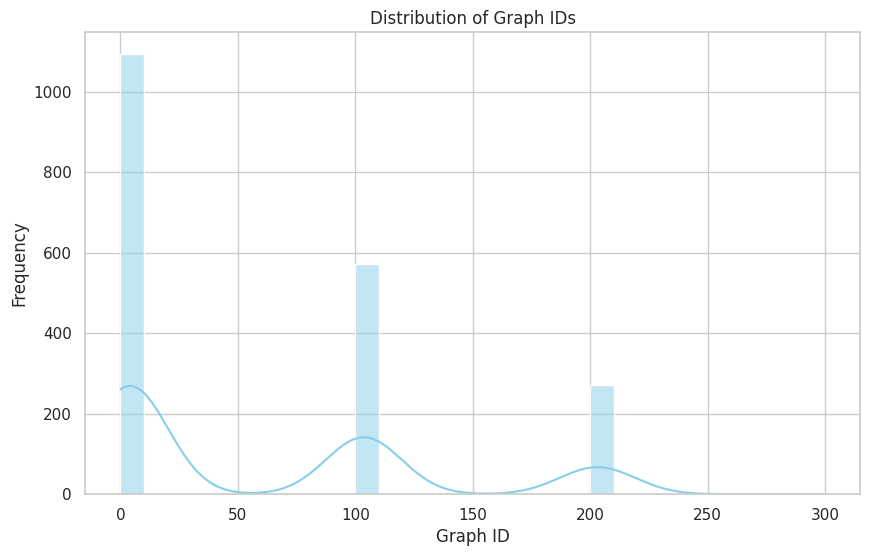

/tmp/ipykernel_152/2774953097.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='source_type', palette='Blues', order=df['source_type'].value_counts().index)


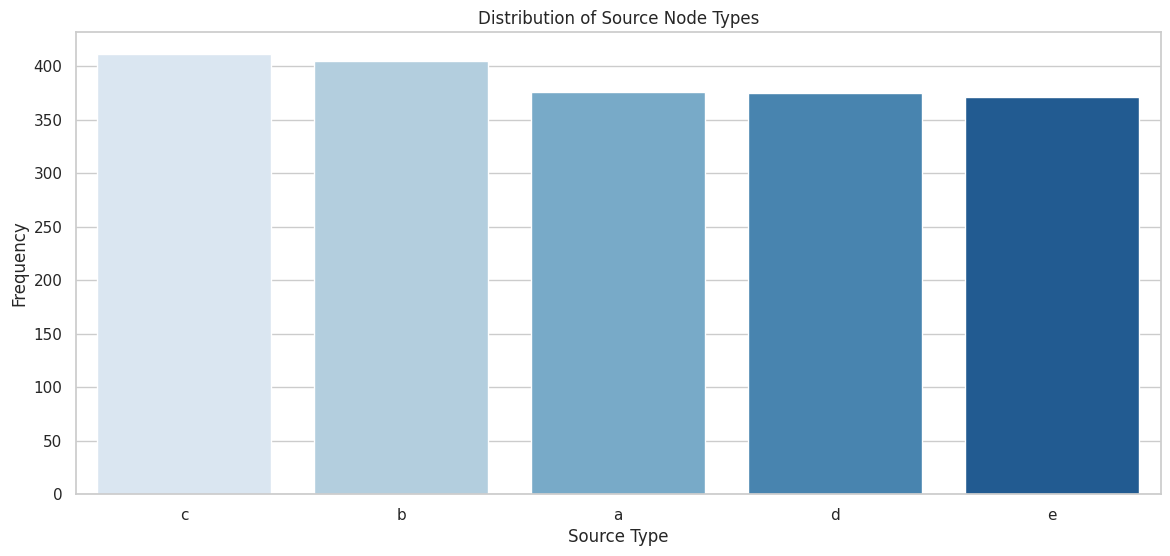

/tmp/ipykernel_152/2774953097.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='destination_type', palette='Oranges', order=df['destination_type'].value_counts().index)


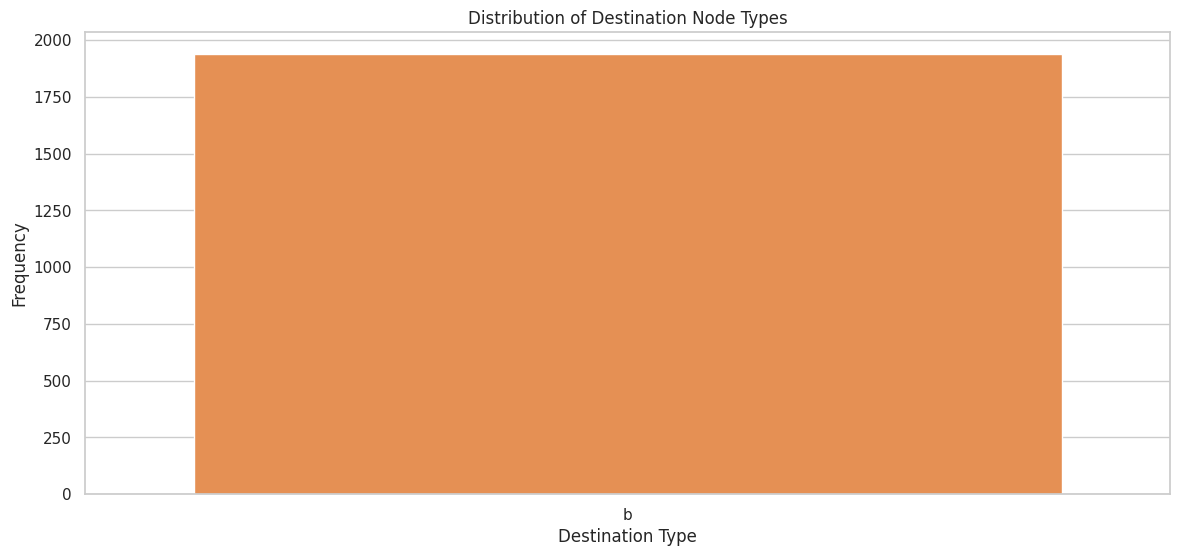

/tmp/ipykernel_152/2774953097.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='edge_type', palette='Greens', order=df['edge_type'].value_counts().index)


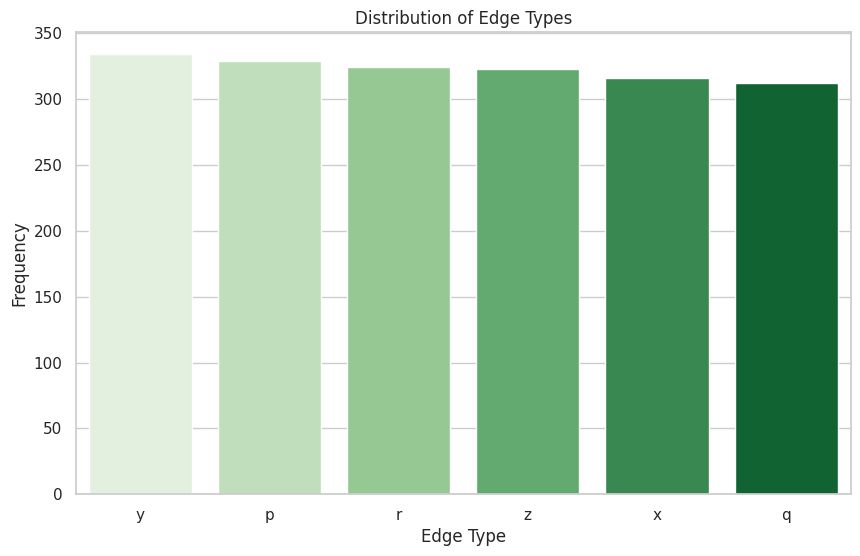

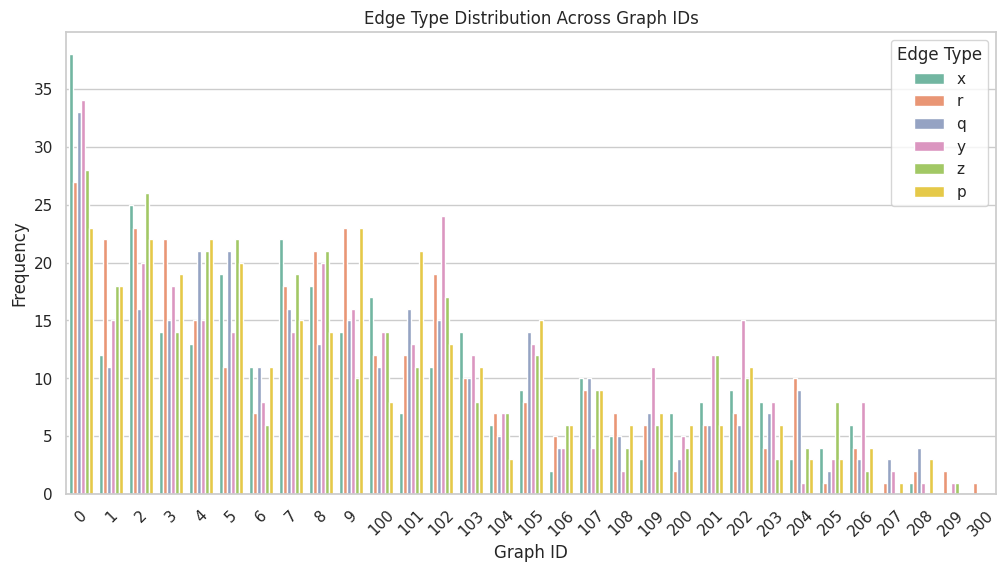

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'randomized_email_edges.txt'  # Change this to your file path
columns = ['source_id', 'source_type', 'destination_id', 'destination_type', 'edge_type', 'graph_id']
df = pd.read_csv(file_path, sep='\t', names=columns)

# Set seaborn style for better visualization
sns.set(style="whitegrid")

# 1. Distribution of Graph IDs
plt.figure(figsize=(10, 6))
sns.histplot(df['graph_id'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Graph IDs')
plt.xlabel('Graph ID')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Node Types
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='source_type', palette='Blues', order=df['source_type'].value_counts().index)
plt.title('Distribution of Source Node Types')
plt.xlabel('Source Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='destination_type', palette='Oranges', order=df['destination_type'].value_counts().index)
plt.title('Distribution of Destination Node Types')
plt.xlabel('Destination Type')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of Edge Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='edge_type', palette='Greens', order=df['edge_type'].value_counts().index)
plt.title('Distribution of Edge Types')
plt.xlabel('Edge Type')
plt.ylabel('Frequency')
plt.show()

# 4. Graph ID vs. Edge Types (to see edge diversity across graphs)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='graph_id', hue='edge_type', palette='Set2')
plt.title('Edge Type Distribution Across Graph IDs')
plt.xlabel('Graph ID')
plt.ylabel('Frequency')
plt.legend(title='Edge Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Load the existing dataset
df = pd.read_csv('formatted_email_edges3.txt', sep='\t', header=None, names=['source_id', 'source_type', 'dest_id', 'dest_type', 'edge_type', 'graph_id'])

# Increase diversity of edge types and node types
edge_types = ['t', 'u', 'v', 'w', 'x', 'y', 'z']
node_types = ['a', 'b', 'c', 'd', 'e']

# Randomize the edge type column
df['edge_type'] = np.random.choice(edge_types, size=len(df))

# Randomize the source and destination node types
df['source_type'] = np.random.choice(node_types, size=len(df))
df['dest_type'] = np.random.choice(node_types, size=len(df))

# Add more graph IDs to diversify clusters
max_graph_id = df['graph_id'].max()
new_graph_ids = np.random.randint(0, max_graph_id + 100, size=len(df))
df['graph_id'] = new_graph_ids

# Save the updated dataset
df.to_csv('updated_formatted_email_edges3.txt', sep='\t', header=False, index=False)


In [14]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 7.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np
from collections import defaultdict
import networkx as nx
from scipy.spatial.distance import hamming

# --- Parameters Setup ---
CHUNK_LENGTH = 75
L = 1400
SEED = 23
np.random.seed(SEED)
TARGET_SCORE = 0.32285  # Target for cluster 0
STRICT_BUFFER = 0.005  # Strict buffer for cluster 0
GLOBAL_THRESHOLD = 0.3
ANOMALY_THRESHOLD = 0.49

MAX_UINT64 = np.iinfo(np.uint64).max
H = [np.random.randint(0, MAX_UINT64, CHUNK_LENGTH+2, dtype=np.uint64) for _ in range(L)]

# Hashing shingles to binary
def hash_shingle(shingle, randbits):
    sum_hash = int(randbits[0])
    for i, char in enumerate(shingle):
        sum_hash += int(randbits[i+1]) * ord(char)
    return 2 * ((sum_hash >> 63) & 1) - 1

# Sketch creation
def construct_streamhash_sketch(shingle_vector):
    projection = np.zeros(L, dtype=int)
    for shingle, count in shingle_vector.items():
        for i in range(L):
            projection[i] += count * hash_shingle(shingle, H[i])
    sketch = np.where(projection >= 0, 1, 0)
    return sketch

# Hamming similarity
def hamming_similarity(sketch1, sketch2):
    return 1 - hamming(sketch1, sketch2)

# Processing edges into graphs
def process_edges(edge_file):
    graphs = defaultdict(nx.DiGraph)
    with open(edge_file, 'r') as f:
        for line in f:
            src_id, src_type, dst_id, dst_type, e_type, gid = line.strip().split()
            graphs[int(gid)].add_edge((src_id, src_type), (dst_id, dst_type), e_type=e_type)
    return graphs

# Creating shingle vectors
def construct_shingle_vectors(graphs):
    shingle_vectors = {}
    for gid, graph in graphs.items():
        shingle_vector = defaultdict(int)
        for u, v, data in graph.edges(data=True):
            src_type, dst_type = u[1], v[1]
            shingle = f"{src_type}{data['e_type']}{dst_type}"
            shingle_vector[shingle] += 1
        shingle_vectors[gid] = shingle_vector
    return shingle_vectors

# Update centroid sketches with a weighted average
def update_centroid_sketches(clusters, graph_sketches):
    centroid_sketches = {}
    for cluster_id, gids in clusters.items():
        cluster_size = len(gids)
        if cluster_size > 0:
            centroid_projection = np.mean([graph_sketches[gid] for gid in gids], axis=0)
            centroid_sketch = np.where(centroid_projection >= 0, 1, 0)
            centroid_sketches[cluster_id] = centroid_sketch
    return centroid_sketches

# Update distances and clusters with refined logic
def update_distances_and_clusters(gid, graph_sketches, centroid_sketches, clusters):
    sketch = graph_sketches[gid]
    min_distance = 1.0
    nearest_cluster = None

    # Calculate similarity with each cluster centroid
    for cluster_id, centroid_sketch in centroid_sketches.items():
        sim = hamming_similarity(sketch, centroid_sketch)
        distance = 1.0 - sim
        if distance < min_distance:
            min_distance = distance
            nearest_cluster = cluster_id

    # Clustering logic based on strict assignment
    if abs(min_distance - TARGET_SCORE) <= STRICT_BUFFER:
        clusters[0].append(gid)
        print(f"Graph {gid} assigned to cluster 0 with score: {min_distance}")
    elif nearest_cluster == 0 and min_distance <= ANOMALY_THRESHOLD:
        clusters[1].append(gid)
        print(f"Graph {gid} assigned to cluster 1 with score: {min_distance}")
    else:
        print(f"Graph {gid} is considered an anomaly with score: {min_distance}")

# Main function
def main():
    graphs = process_edges('randomized_email_edges.txt')
    clusters = defaultdict(list)

    shingle_vectors = construct_shingle_vectors(graphs)
    graph_sketches = {}

    # Initialize with the first graph as the initial cluster
    initial_gid = list(shingle_vectors.keys())[0]
    initial_sketch = construct_streamhash_sketch(shingle_vectors[initial_gid])
    graph_sketches[initial_gid] = initial_sketch
    clusters[0] = [initial_gid]

    for gid, shingle_vector in shingle_vectors.items():
        if gid != initial_gid:
            sketch = construct_streamhash_sketch(shingle_vector)
            graph_sketches[gid] = sketch

    centroid_sketches = update_centroid_sketches(clusters, graph_sketches)

    print(f"Graph Sketches IDs: {list(graph_sketches.keys())}")
    print(f"Clusters: {clusters}")
    
    for gid in graph_sketches.keys():
        if gid != initial_gid:
            update_distances_and_clusters(gid, graph_sketches, centroid_sketches, clusters)

if __name__ == "__main__":
    main()


Graph Sketches IDs: [7, 8, 105, 202, 206, 6, 107, 104, 106, 2, 3, 0, 9, 5, 1, 103, 101, 204, 201, 208, 100, 102, 4, 205, 203, 108, 209, 109, 200, 207, 300]
Clusters: defaultdict(<class 'list'>, {0: [7]})
Graph 8 is considered an anomaly with score: 0.5121428571428571
Graph 105 is considered an anomaly with score: 0.505
Graph 202 assigned to cluster 1 with score: 0.4742857142857143
Graph 206 is considered an anomaly with score: 0.49857142857142855
Graph 6 assigned to cluster 1 with score: 0.4664285714285714
Graph 107 is considered an anomaly with score: 0.5228571428571429
Graph 104 is considered an anomaly with score: 0.5157142857142857
Graph 106 is considered an anomaly with score: 0.49071428571428566
Graph 2 is considered an anomaly with score: 0.49142857142857144
Graph 3 assigned to cluster 1 with score: 0.48571428571428577
Graph 0 is considered an anomaly with score: 0.5157142857142857
Graph 9 is considered an anomaly with score: 0.505
Graph 5 is considered an anomaly with score: 0.

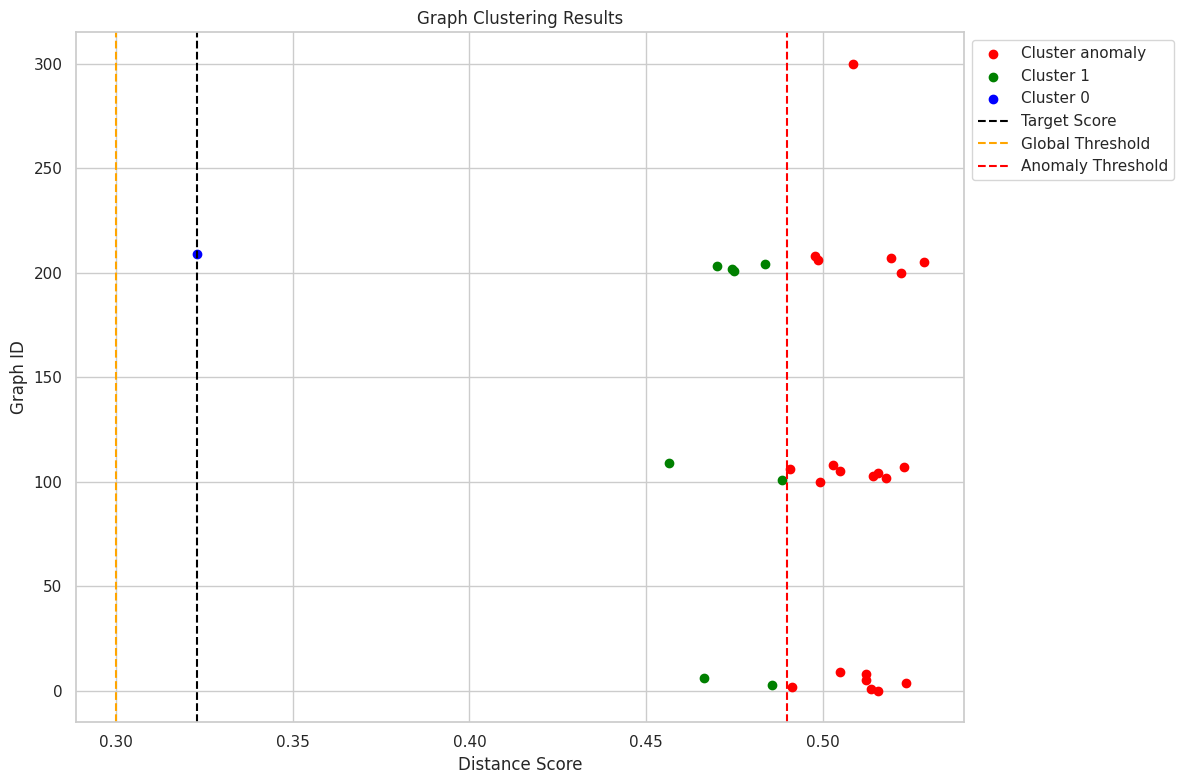

In [63]:
import numpy as np
from collections import defaultdict
import networkx as nx
from scipy.spatial.distance import hamming
import matplotlib.pyplot as plt

# --- Parameters Setup ---
CHUNK_LENGTH = 75
L = 1400
SEED = 23
np.random.seed(SEED)
TARGET_SCORE = 0.32285 
STRICT_BUFFER = 0.005  
GLOBAL_THRESHOLD = 0.3
ANOMALY_THRESHOLD = 0.49

MAX_UINT64 = np.iinfo(np.uint64).max
H = [np.random.randint(0, MAX_UINT64, CHUNK_LENGTH+2, dtype=np.uint64) for _ in range(L)]

# Hashing shingles to binary
def hash_shingle(shingle, randbits):
    sum_hash = int(randbits[0])
    for i, char in enumerate(shingle):
        sum_hash += int(randbits[i+1]) * ord(char)
    return 2 * ((sum_hash >> 63) & 1) - 1

# Sketch creation
def construct_streamhash_sketch(shingle_vector):
    projection = np.zeros(L, dtype=int)
    for shingle, count in shingle_vector.items():
        for i in range(L):
            projection[i] += count * hash_shingle(shingle, H[i])
    sketch = np.where(projection >= 0, 1, 0)
    return sketch

# Hamming similarity
def hamming_similarity(sketch1, sketch2):
    return 1 - hamming(sketch1, sketch2)

# Processing edges into graphs
def process_edges(edge_file):
    graphs = defaultdict(nx.DiGraph)
    with open(edge_file, 'r') as f:
        for line in f:
            src_id, src_type, dst_id, dst_type, e_type, gid = line.strip().split()
            graphs[int(gid)].add_edge((src_id, src_type), (dst_id, dst_type), e_type=e_type)
    return graphs

# Creating shingle vectors
def construct_shingle_vectors(graphs):
    shingle_vectors = {}
    for gid, graph in graphs.items():
        shingle_vector = defaultdict(int)
        for u, v, data in graph.edges(data=True):
            src_type, dst_type = u[1], v[1]
            shingle = f"{src_type}{data['e_type']}{dst_type}"
            shingle_vector[shingle] += 1
        shingle_vectors[gid] = shingle_vector
    return shingle_vectors

# Update centroid sketches with a weighted average
def update_centroid_sketches(clusters, graph_sketches):
    centroid_sketches = {}
    for cluster_id, gids in clusters.items():
        cluster_size = len(gids)
        if cluster_size > 0:
            centroid_projection = np.mean([graph_sketches[gid] for gid in gids], axis=0)
            centroid_sketch = np.where(centroid_projection >= 0, 1, 0)
            centroid_sketches[cluster_id] = centroid_sketch
    return centroid_sketches

# Update distances and clusters with refined logic
def update_distances_and_clusters(gid, graph_sketches, centroid_sketches, clusters, distances, graph_ids, cluster_labels):
    sketch = graph_sketches[gid]
    min_distance = 1.0
    nearest_cluster = None

    # Calculate similarity with each cluster centroid
    for cluster_id, centroid_sketch in centroid_sketches.items():
        sim = hamming_similarity(sketch, centroid_sketch)
        distance = 1.0 - sim
        if distance < min_distance:
            min_distance = distance
            nearest_cluster = cluster_id

    # Store the results for visualization
    distances.append(min_distance)
    graph_ids.append(gid)

    # Clustering logic based on strict assignment
    if abs(min_distance - TARGET_SCORE) <= STRICT_BUFFER:
        clusters[0].append(gid)
        cluster_labels.append(0)
    elif nearest_cluster == 0 and min_distance <= ANOMALY_THRESHOLD:
        clusters[1].append(gid)
        cluster_labels.append(1)
    else:
        cluster_labels.append('anomaly')

# Main function with visualization
def main():
    graphs = process_edges('randomized_email_edges.txt')
    clusters = defaultdict(list)

    shingle_vectors = construct_shingle_vectors(graphs)
    graph_sketches = {}

    # Initialize with the first graph as the initial cluster
    initial_gid = list(shingle_vectors.keys())[0]
    initial_sketch = construct_streamhash_sketch(shingle_vectors[initial_gid])
    graph_sketches[initial_gid] = initial_sketch
    clusters[0] = [initial_gid]

    # Lists for visualization
    distances = []
    graph_ids = []
    cluster_labels = []

    for gid, shingle_vector in shingle_vectors.items():
        if gid != initial_gid:
            sketch = construct_streamhash_sketch(shingle_vector)
            graph_sketches[gid] = sketch

    centroid_sketches = update_centroid_sketches(clusters, graph_sketches)
    
    # Processing clusters and distances
    for gid in graph_sketches.keys():
        if gid != initial_gid:
            update_distances_and_clusters(gid, graph_sketches, centroid_sketches, clusters, distances, graph_ids, cluster_labels)

    # Visualization
    cluster_colors = {'anomaly': 'red', 0: 'blue', 1: 'green'}

    plt.figure(figsize=(12, 8))
    for gid, distance, cluster in zip(graph_ids, distances, cluster_labels):
        plt.scatter(distance, gid, color=cluster_colors[cluster], label=f'Cluster {cluster}' if f'Cluster {cluster}' not in plt.gca().get_legend_handles_labels()[1] else "")

    # Adding vertical lines for thresholds
    plt.axvline(x=TARGET_SCORE, color='black', linestyle='--', label='Target Score')
    plt.axvline(x=GLOBAL_THRESHOLD, color='orange', linestyle='--', label='Global Threshold')
    plt.axvline(x=ANOMALY_THRESHOLD, color='red', linestyle='--', label='Anomaly Threshold')

    # Adding labels and legend
    plt.xlabel('Distance Score')
    plt.ylabel('Graph ID')
    plt.title('Graph Clustering Results')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
